In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Carregando dados
df = pd.read_csv('house_data.csv')
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [4]:
# deletando colunas que não serão utilizadas
df.drop(columns=['fire insurance (R$)','total (R$)'], inplace=True)
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [5]:
df.rename(columns={
    'city':'Cidade',
    'area':'Area',
    'rooms':'Quartos',
    'bathroom':'Banheiros',
    'parking spaces':'Vagas Estacionamento',
    'floor':'Piso',
    'animal':'Animais',
    'furniture':'Mobilia',
    'hoa (R$)':'Condominio',
    'rent amount (R$)':'Valor Aluguel',
    'property tax (R$)':'Taxa da propriedade'
}, inplace=True)

df.head()

,Cidade,Area,Quartos,Banheiros,Vagas Estacionamento,Piso,Animais,Mobilia,Condominio,Valor Aluguel,Taxa da propriedade
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [6]:
# Verificar campos vazios
df.isnull().sum()

Cidade                  0
Area                    0
Quartos                 0
Banheiros               0
Vagas Estacionamento    0
Piso                    0
Animais                 0
Mobilia                 0
Condominio              0
Valor Aluguel           0
Taxa da propriedade     0
dtype: int64

In [7]:
# Verificar campos unicos
df.nunique()

Cidade                     5
Area                     517
Quartos                   11
Banheiros                 10
Vagas Estacionamento      11
Piso                      35
Animais                    2
Mobilia                    2
Condominio              1679
Valor Aluguel           1195
Taxa da propriedade     1243
dtype: int64

In [8]:
# tipos das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cidade                10692 non-null  object
 1   Area                  10692 non-null  int64 
 2   Quartos               10692 non-null  int64 
 3   Banheiros             10692 non-null  int64 
 4   Vagas Estacionamento  10692 non-null  int64 
 5   Piso                  10692 non-null  object
 6   Animais               10692 non-null  object
 7   Mobilia               10692 non-null  object
 8   Condominio            10692 non-null  int64 
 9   Valor Aluguel         10692 non-null  int64 
 10  Taxa da propriedade   10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [9]:
#tipo das colunas simplificados
df.dtypes

Cidade                  object
Area                     int64
Quartos                  int64
Banheiros                int64
Vagas Estacionamento     int64
Piso                    object
Animais                 object
Mobilia                 object
Condominio               int64
Valor Aluguel            int64
Taxa da propriedade      int64
dtype: object

# Exploração Analítica 

In [10]:
colunasCategoricas = df.columns[df.dtypes == object]
colunasNumericas = df.columns[df.dtypes != object]

colunasCategoricas,colunasNumericas

(Index(['Cidade', 'Piso', 'Animais', 'Mobilia'], dtype='object'),
 Index(['Area', 'Quartos', 'Banheiros', 'Vagas Estacionamento', 'Condominio',
        'Valor Aluguel', 'Taxa da propriedade'],
       dtype='object'))

In [11]:
# Análise da coluna cidade
df['Cidade'].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: Cidade, dtype: int64

In [12]:
# Correção dos dados
df.loc[df['Piso'] == '301']
df.iloc[2562, 5] = '30'

In [13]:
# Excluir traço da coluna Piso
df['Piso'] = df['Piso'].apply(lambda registro : 0 if registro =='-' else registro)
df['Piso'] = pd.to_numeric(df['Piso'])

df.head()

,Cidade,Area,Quartos,Banheiros,Vagas Estacionamento,Piso,Animais,Mobilia,Condominio,Valor Aluguel,Taxa da propriedade
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [14]:
# Verificar a porcentagem de cada Andar(piso)
df['Piso'].value_counts(normalize=True)

0     0.230172
1     0.101104
2     0.092125
3     0.087074
4     0.069959
5     0.056117
6     0.050412
7     0.046483
8     0.045829
9     0.034512
10    0.033389
11    0.028339
12    0.024037
13    0.018706
14    0.015900
15    0.013749
16    0.010195
17    0.008979
18    0.007015
19    0.004957
20    0.004115
21    0.003928
23    0.002338
25    0.002338
22    0.002245
26    0.001871
24    0.001777
27    0.000748
28    0.000561
29    0.000468
32    0.000187
51    0.000094
30    0.000094
46    0.000094
35    0.000094
Name: Piso, dtype: float64

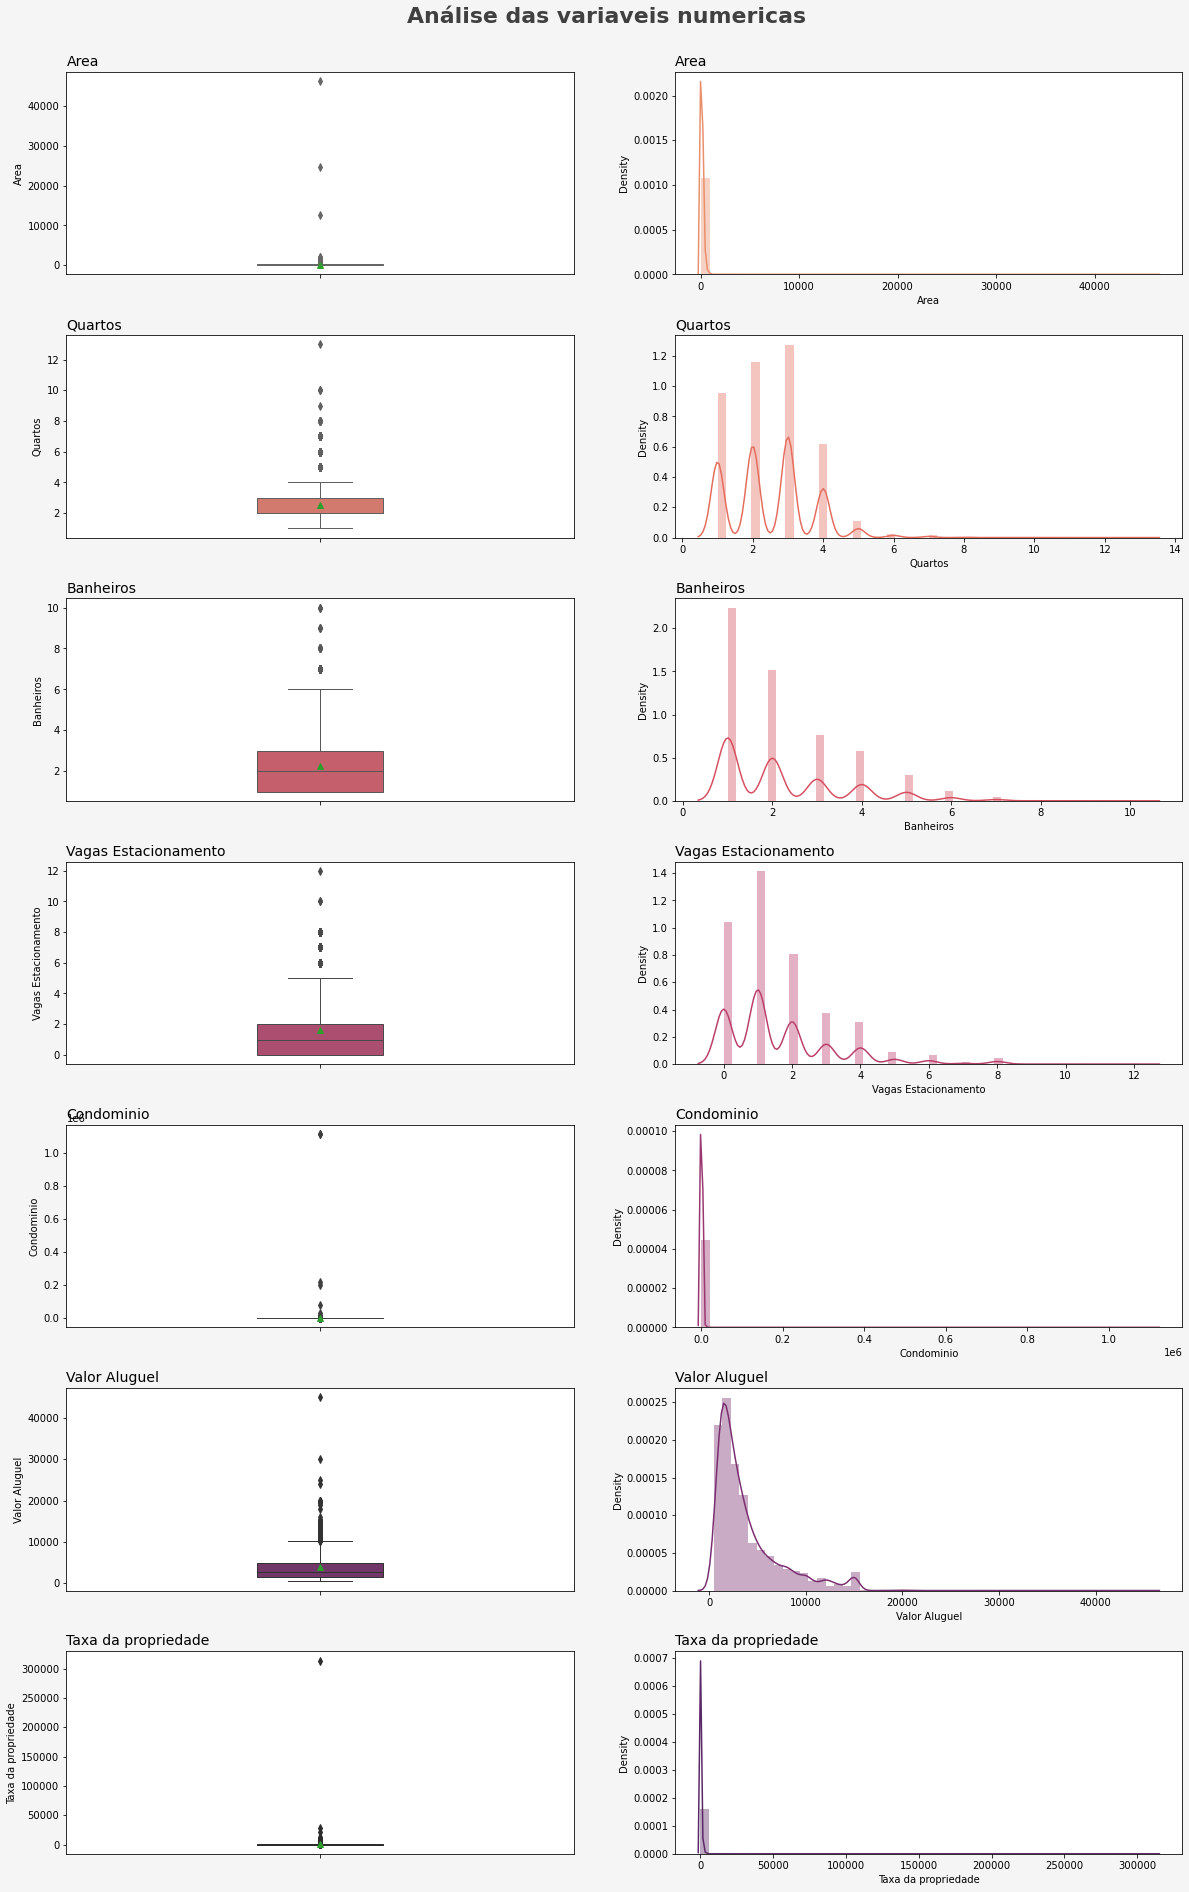

In [15]:
# Criação do Grid

#tamanho
figura,eixo = plt.subplots(figsize=(20,30))
#cor de fundo
cor_fundo = '#f5f5f5'
figura.set_facecolor(cor_fundo)

#paleta de cores
paleta_cores = sns.color_palette('flare', len(colunasNumericas) * 2)

#Titulo
plt.suptitle('Análise das variaveis numericas', fontsize=22, color='#404040', fontweight=600)

#Estrutura
linhas = 7
colunas = 2 
posicao = 1

#loop para plotar os gráficos
for coluna in colunasNumericas:
    #boxplot
    plt.subplot(linhas,colunas,posicao)
    
    #título
    plt.title(f'{coluna}', loc='left', fontsize=14, fontweight=200)
    
    #plot
    sns.boxplot (data=df, y=coluna, showmeans=True, saturation=0.75, linewidth=1, color=paleta_cores[posicao], width=0.25)
    
    posicao += 1
    
    #displot
    plt.subplot(linhas,colunas,posicao)
    
    #plot
    sns.distplot(df[coluna], color=paleta_cores[posicao - 1])
    
     #título
    plt.title(f'{coluna}', loc='left', fontsize=14, fontweight=200)
    
    
    posicao += 1
    
#ajuste do grid
plt.subplots_adjust(top = 0.95, hspace=0.3)

In [16]:
# verificar análise por área(m2) de imoveis
df.loc[df['Area'] <= 10000]['Area'].describe()

count    10689.000000
mean       141.431846
std        134.348219
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max       2000.000000
Name: Area, dtype: float64

In [17]:
#Alterar o valor da coluna com map
df['Animais'] = df['Animais'].map({'acept':'Sim','not acept':'Não'})
df['Mobilia'] = df['Mobilia'].map({'furnished':'Sim','not furnished':'Não'})

In [18]:
df.head(5)

,Cidade,Area,Quartos,Banheiros,Vagas Estacionamento,Piso,Animais,Mobilia,Condominio,Valor Aluguel,Taxa da propriedade
0,São Paulo,70,2,1,1,7,Sim,Sim,2065,3300,211
1,São Paulo,320,4,4,0,20,Sim,Não,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,Sim,Não,1000,2800,0
3,Porto Alegre,51,2,1,0,2,Sim,Não,270,1112,22
4,São Paulo,25,1,1,0,1,Não,Não,0,800,25


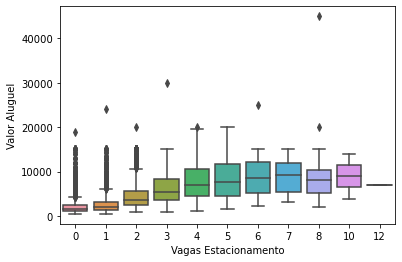

In [25]:
plt.figure(figsize=(15,6))
plt.title("C")
sns.boxplot(data=df, x="Vagas Estacionamento", y="Valor Aluguel");


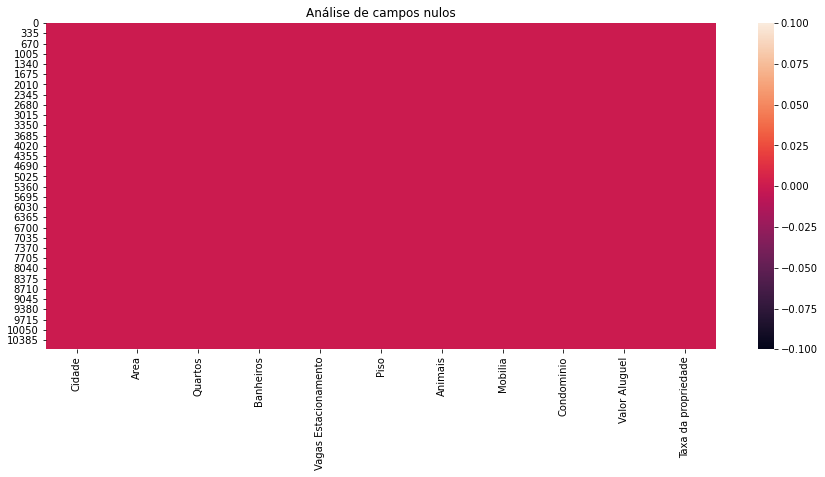

In [24]:
# Avaliando campos nulos
plt.figure(figsize=(15,6))
plt.title("Análise de campos nulos")
sns.heatmap(df.isnull());